In [1]:
#importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
dataset = pd.read_csv('C:\\Users\\khushi\\Downloads\\Crimes_2001_2022.csv',low_memory=False)
 
dataset.head(10)

# dataset.dtypes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09-05-2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02-10-2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09-04-2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,02-10-2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09-01-2018 00:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,04-06-2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,09-05-2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02-10-2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09-05-2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02-10-2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09-05-2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,02-10-2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,09-04-2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015,02-10-2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,09-05-2015 13:00,025XX W CERMAK RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,6,1159734.0,1889313.0,2015,9/17/2015 11:37,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,09-05-2015 11:30,031XX W WASHINGTON BLVD,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,3,1155536.0,1900515.0,2015,02-10-2018 15:50,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,05-01-2016 00:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04-06-2019 16:04,NaN,NaN,NaN


In [3]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['ID','Case Number','Description','Updated On','Block'])
# X.shape

print('Columns in dataset: ', dataset.columns)


dataset.shape

Columns in dataset:  Index(['Date', 'IUCR', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


(23000, 17)

In [4]:
# droping the null value enteries drop null 
dataset.dropna(inplace=True)
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,09-05-2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,09-04-2015 11:30,870,THEFT,CTA BUS,False,False,1511,15,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,09-05-2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,09-05-2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,09-05-2015 10:55,610,BURGLARY,RESIDENCE,False,False,614,6,21.0,71.0,5,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,10-04-2015 21:19,502P,OTHER OFFENSE,STREET,False,False,722,7,6.0,68.0,26,1173716.0,1860663.0,2015,41.773071,-87.638752,"(41.773071271, -87.638751579)"
22996,10-04-2015 20:30,890,THEFT,RESTAURANT,False,False,114,1,42.0,32.0,6,1177276.0,1901405.0,2015,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10-04-2015 04:14,820,THEFT,RESTAURANT,False,False,1712,17,39.0,14.0,6,1150689.0,1931638.0,2015,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10-04-2015 19:14,460,BATTERY,APARTMENT,True,True,1713,17,33.0,14.0,08B,1154216.0,1930513.0,2015,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [5]:
# ignore latitude and logitude outside of the chicago
dataset=dataset[(dataset["Latitude"] < 45)
             & (dataset["Latitude"] > 40)
             & (dataset["Longitude"] < -85)
             & (dataset["Longitude"] > -90)]
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,09-05-2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,09-04-2015 11:30,870,THEFT,CTA BUS,False,False,1511,15,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,09-05-2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,09-05-2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,09-05-2015 10:55,610,BURGLARY,RESIDENCE,False,False,614,6,21.0,71.0,5,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,10-04-2015 21:19,502P,OTHER OFFENSE,STREET,False,False,722,7,6.0,68.0,26,1173716.0,1860663.0,2015,41.773071,-87.638752,"(41.773071271, -87.638751579)"
22996,10-04-2015 20:30,890,THEFT,RESTAURANT,False,False,114,1,42.0,32.0,6,1177276.0,1901405.0,2015,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10-04-2015 04:14,820,THEFT,RESTAURANT,False,False,1712,17,39.0,14.0,6,1150689.0,1931638.0,2015,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10-04-2015 19:14,460,BATTERY,APARTMENT,True,True,1713,17,33.0,14.0,08B,1154216.0,1930513.0,2015,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [6]:
## listing the crimes category wise with their counts
types=dataset['Primary Type'].value_counts().sort_values(ascending=False)
types

THEFT                                4947
BATTERY                              4150
CRIMINAL DAMAGE                      2455
NARCOTICS                            1785
ASSAULT                              1458
OTHER OFFENSE                        1404
DECEPTIVE PRACTICE                   1303
BURGLARY                             1167
ROBBERY                               906
MOTOR VEHICLE THEFT                   846
CRIMINAL TRESPASS                     493
WEAPONS VIOLATION                     315
PUBLIC PEACE VIOLATION                212
OFFENSE INVOLVING CHILDREN            164
INTERFERENCE WITH PUBLIC OFFICER      112
CRIM SEXUAL ASSAULT                   111
SEX OFFENSE                            75
PROSTITUTION                           60
ARSON                                  35
GAMBLING                               31
LIQUOR LAW VIOLATION                   26
KIDNAPPING                             17
STALKING                               15
OBSCENITY                         

In [7]:
# crime types according to their counts in dataframe
# 15 classes
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY','MOTOR VEHICLE THEFT'
#               ,'ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','OFFENSE INVOLVING CHILDREN','PUBLIC PEACE VIOLATION','CRIM SEXUAL ASSAULT']
# 8 classes
# storing major crime types according to their counts in dataframe
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPT

In [8]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']

In [9]:
crime_df = dataset.loc[dataset['Primary Type'] .isin(major_crimes)]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,09-05-2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,09-04-2015 11:30,870,THEFT,CTA BUS,False,False,1511,15,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,09-05-2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,09-05-2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,09-05-2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,10-04-2015 01:00,1320,CRIMINAL DAMAGE,STREET,False,False,2535,25,30.0,23.0,14,1150791.0,1910816.0,2015,41.911175,-87.721480,"(41.911174838, -87.721479886)"
22996,10-04-2015 20:30,890,THEFT,RESTAURANT,False,False,114,1,42.0,32.0,6,1177276.0,1901405.0,2015,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10-04-2015 04:14,820,THEFT,RESTAURANT,False,False,1712,17,39.0,14.0,6,1150689.0,1931638.0,2015,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10-04-2015 19:14,460,BATTERY,APARTMENT,True,True,1713,17,33.0,14.0,08B,1154216.0,1930513.0,2015,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [10]:
data = crime_df.pivot_table(index='Year', columns='Primary Type', aggfunc='count')
print(data)

# since we dont have different crimes in early years so we drop data of these years.

              Arrest                                    Beat          \
Primary Type ASSAULT BATTERY CRIMINAL DAMAGE   THEFT ASSAULT BATTERY   
Year                                                                   
2012             NaN     NaN             NaN     1.0     NaN     NaN   
2014             1.0     4.0             NaN    11.0     1.0     4.0   
2015          1430.0  4075.0          2421.0  4859.0  1430.0  4075.0   
2017             1.0     NaN             NaN     NaN     1.0     NaN   
2018             1.0     1.0             NaN     NaN     1.0     1.0   
2019            23.0    69.0            34.0    69.0    23.0    69.0   
2020             2.0     1.0             NaN     7.0     2.0     1.0   

                                     Community Area          ...  \
Primary Type CRIMINAL DAMAGE   THEFT        ASSAULT BATTERY  ...   
Year                                                         ...   
2012                     NaN     1.0            NaN     NaN  ...   
2014   

In [11]:
# selecting the dataset which starts from 2015
crime_df=crime_df[crime_df['Year']>=2015]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,09-05-2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,09-04-2015 11:30,870,THEFT,CTA BUS,False,False,1511,15,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,09-05-2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,09-05-2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,09-05-2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,10-04-2015 01:00,1320,CRIMINAL DAMAGE,STREET,False,False,2535,25,30.0,23.0,14,1150791.0,1910816.0,2015,41.911175,-87.721480,"(41.911174838, -87.721479886)"
22996,10-04-2015 20:30,890,THEFT,RESTAURANT,False,False,114,1,42.0,32.0,6,1177276.0,1901405.0,2015,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10-04-2015 04:14,820,THEFT,RESTAURANT,False,False,1712,17,39.0,14.0,6,1150689.0,1931638.0,2015,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10-04-2015 19:14,460,BATTERY,APARTMENT,True,True,1713,17,33.0,14.0,08B,1154216.0,1930513.0,2015,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [12]:
temp=crime_df.copy()
temp

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,09-05-2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,09-04-2015 11:30,870,THEFT,CTA BUS,False,False,1511,15,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,09-05-2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,09-05-2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,09-05-2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,10-04-2015 01:00,1320,CRIMINAL DAMAGE,STREET,False,False,2535,25,30.0,23.0,14,1150791.0,1910816.0,2015,41.911175,-87.721480,"(41.911174838, -87.721479886)"
22996,10-04-2015 20:30,890,THEFT,RESTAURANT,False,False,114,1,42.0,32.0,6,1177276.0,1901405.0,2015,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10-04-2015 04:14,820,THEFT,RESTAURANT,False,False,1712,17,39.0,14.0,6,1150689.0,1931638.0,2015,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10-04-2015 19:14,460,BATTERY,APARTMENT,True,True,1713,17,33.0,14.0,08B,1154216.0,1930513.0,2015,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [13]:
# Data is divided into 3 equal parts
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

4331

In [14]:
first=temp.iloc[0:portion,:]
first.shape

(4331, 17)

In [15]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(4331, 17)

In [16]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape

(4329, 17)

In [17]:
# picking random 2k enteries from the first part
index=np.random.choice(portion,replace=False,size = 2000)
df_frst=first.iloc[index]
df_frst

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
5164,09-12-2015 03:20,460,BATTERY,STREET,False,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,"(41.914675846, -87.638871656)"
5576,09-12-2015 19:00,1320,CRIMINAL DAMAGE,STREET,False,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,"(41.883446467, -87.746613237)"
1303,08-02-2015 12:00,486,BATTERY,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,False,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,"(41.979006297, -87.906463155)"
1759,09-07-2015 18:10,860,THEFT,GROCERY FOOD STORE,True,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,"(41.953443342, -87.744957048)"
6263,9/13/2015 13:00,486,BATTERY,APARTMENT,False,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,"(41.77073104, -87.582575826)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,09-10-2015 08:06,560,ASSAULT,APARTMENT,False,True,823,8,15.0,66.0,08A,1156149.0,1862215.0,2015,41.777701,-87.703107,"(41.777701473, -87.703106505)"
5210,10/13/2019 8:00,1320,CRIMINAL DAMAGE,STREET,False,False,2223,22,21.0,71.0,14,1174532.0,1845675.0,2019,41.731924,-87.636206,"(41.731924228, -87.636205518)"
4797,09-10-2015 16:20,820,THEFT,STREET,False,False,1512,15,29.0,25.0,6,1137694.0,1900373.0,2015,41.882764,-87.769846,"(41.882764239, -87.76984646)"
2553,09-08-2015 08:00,890,THEFT,APARTMENT,False,False,832,8,17.0,66.0,6,1162383.0,1858860.0,2015,41.768367,-87.680346,"(41.768367244, -87.680345818)"


In [18]:
# picking random 2k enteries from the second half

index=np.random.choice(portion,replace=False,size = 2000)
df_scnd=scnd.iloc[index]
df_scnd

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
11233,9/15/2015 20:00,1320,CRIMINAL DAMAGE,STREET,False,False,133,1,4.0,35.0,14,1179955.0,1884993.0,2015,41.839694,-87.615136,"(41.839694322, -87.615135847)"
10056,9/16/2015 15:50,460,BATTERY,SIDEWALK,True,False,331,3,5.0,43.0,08B,1191387.0,1860131.0,2015,41.771202,-87.573992,"(41.771201531, -87.573992218)"
8672,09-05-2015 12:00,820,THEFT,STREET,False,False,1523,15,28.0,25.0,6,1139459.0,1901158.0,2015,41.884886,-87.763346,"(41.884886395, -87.763346076)"
9704,9/17/2015 15:09,860,THEFT,DRUG STORE,True,False,1934,19,44.0,6.0,6,1171402.0,1919138.0,2015,41.933582,-87.645517,"(41.933582379, -87.645517082)"
10516,9/18/2015 18:25,486,BATTERY,RESIDENCE,False,True,923,9,14.0,63.0,08B,1157095.0,1868677.0,2015,41.795415,-87.699464,"(41.795415045, -87.699463776)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,9/16/2015 20:00,890,THEFT,DRUG STORE,False,False,2012,20,40.0,77.0,6,1165048.0,1936387.0,2015,41.981052,-87.668376,"(41.981051896, -87.668375719)"
11868,9/20/2015 10:47,860,THEFT,GROCERY FOOD STORE,True,False,523,5,34.0,53.0,6,1173297.0,1821020.0,2015,41.664295,-87.641455,"(41.664294511, -87.641455374)"
14352,9/23/2015 12:20,460,BATTERY,STREET,False,False,1223,12,2.0,28.0,08B,1161166.0,1900965.0,2015,41.883933,-87.683640,"(41.883933483, -87.683639616)"
13532,7/13/2015 0:01,810,THEFT,BANK,False,False,511,5,9.0,49.0,6,1175706.0,1837953.0,2015,41.710708,-87.632135,"(41.710707836, -87.632135108)"


In [19]:
# picking random 1k enteries from the third half

index=np.random.choice(portion,replace=False,size = 1000)
df_third=third.iloc[index]
df_third

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
17408,9/27/2015 5:30,820,THEFT,CTA TRAIN,False,False,634,6,21.0,49.0,6,1177762.0,1841949.0,2015,41.721627,-87.624485,"(41.721627204, -87.624485177)"
22556,10-04-2015 05:00,1320,CRIMINAL DAMAGE,STREET,False,False,833,8,13.0,65.0,14,1148453.0,1859151.0,2015,41.769445,-87.731399,"(41.769444661, -87.731399143)"
22781,10-02-2015 14:45,810,THEFT,OTHER,False,False,123,1,2.0,32.0,6,1176487.0,1896508.0,2015,41.871371,-87.627514,"(41.871371147, -87.627514417)"
15326,9/24/2015 16:45,1320,CRIMINAL DAMAGE,STREET,False,False,825,8,15.0,66.0,14,1161126.0,1862647.0,2015,41.778785,-87.684849,"(41.778785401, -87.684848686)"
18062,9/26/2015 21:00,486,BATTERY,RESIDENCE,False,True,1532,15,37.0,25.0,08B,1143358.0,1903540.0,2015,41.891351,-87.748969,"(41.891350929, -87.748968588)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20095,9/26/2015 3:00,486,BATTERY,RESIDENCE,False,True,1915,19,46.0,3.0,08B,1168420.0,1927844.0,2015,41.957537,-87.656223,"(41.957537138, -87.656222966)"
18547,9/28/2015 16:35,486,BATTERY,SIDEWALK,True,True,1532,15,28.0,25.0,08B,1144267.0,1903146.0,2015,41.890253,-87.745640,"(41.890252711, -87.745640133)"
18541,9/28/2015 12:30,890,THEFT,SMALL RETAIL STORE,False,False,111,1,42.0,32.0,6,1176621.0,1902155.0,2015,41.886864,-87.626852,"(41.886863814, -87.626851797)"
22350,10-03-2015 21:05,486,BATTERY,APARTMENT,False,True,1914,19,46.0,3.0,08B,1168791.0,1930493.0,2015,41.964798,-87.654782,"(41.964798032, -87.65478194)"


In [20]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,09-12-2015 03:20,460,BATTERY,STREET,False,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,"(41.914675846, -87.638871656)"
1,09-12-2015 19:00,1320,CRIMINAL DAMAGE,STREET,False,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,"(41.883446467, -87.746613237)"
2,08-02-2015 12:00,486,BATTERY,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,False,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,"(41.979006297, -87.906463155)"
3,09-07-2015 18:10,860,THEFT,GROCERY FOOD STORE,True,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,"(41.953443342, -87.744957048)"
4,9/13/2015 13:00,486,BATTERY,APARTMENT,False,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,"(41.77073104, -87.582575826)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9/26/2015 3:00,486,BATTERY,RESIDENCE,False,True,1915,19,46.0,3.0,08B,1168420.0,1927844.0,2015,41.957537,-87.656223,"(41.957537138, -87.656222966)"
4996,9/28/2015 16:35,486,BATTERY,SIDEWALK,True,True,1532,15,28.0,25.0,08B,1144267.0,1903146.0,2015,41.890253,-87.745640,"(41.890252711, -87.745640133)"
4997,9/28/2015 12:30,890,THEFT,SMALL RETAIL STORE,False,False,111,1,42.0,32.0,6,1176621.0,1902155.0,2015,41.886864,-87.626852,"(41.886863814, -87.626851797)"
4998,10-03-2015 21:05,486,BATTERY,APARTMENT,False,True,1914,19,46.0,3.0,08B,1168791.0,1930493.0,2015,41.964798,-87.654782,"(41.964798032, -87.65478194)"


In [21]:
df=final_df.copy()

In [22]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,09-12-2015 03:20,460,BATTERY,STREET,False,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,-0.048231
1,09-12-2015 19:00,1320,CRIMINAL DAMAGE,STREET,False,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,-0.068916
2,08-02-2015 12:00,486,BATTERY,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,False,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,-0.226267
3,09-07-2015 18:10,860,THEFT,GROCERY FOOD STORE,True,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,-0.130653
4,9/13/2015 13:00,486,BATTERY,APARTMENT,False,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,0.105637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9/26/2015 3:00,486,BATTERY,RESIDENCE,False,True,1915,19,46.0,3.0,08B,1168420.0,1927844.0,2015,41.957537,-87.656223,-0.094312
4996,9/28/2015 16:35,486,BATTERY,SIDEWALK,True,True,1532,15,28.0,25.0,08B,1144267.0,1903146.0,2015,41.890253,-87.745640,-0.074553
4997,9/28/2015 12:30,890,THEFT,SMALL RETAIL STORE,False,False,111,1,42.0,32.0,6,1176621.0,1902155.0,2015,41.886864,-87.626852,-0.017987
4998,10-03-2015 21:05,486,BATTERY,APARTMENT,False,True,1914,19,46.0,3.0,08B,1168791.0,1930493.0,2015,41.964798,-87.654782,-0.100144


In [23]:
# converting date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,2015-09-12 03:20:00,460,BATTERY,STREET,False,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,-0.048231
1,2015-09-12 19:00:00,1320,CRIMINAL DAMAGE,STREET,False,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,-0.068916
2,2015-08-02 12:00:00,486,BATTERY,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,False,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,-0.226267
3,2015-09-07 18:10:00,860,THEFT,GROCERY FOOD STORE,True,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,-0.130653
4,2015-09-13 13:00:00,486,BATTERY,APARTMENT,False,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,0.105637
5,2015-09-11 11:30:00,560,ASSAULT,SIDEWALK,False,False,332,3,5.0,43.0,08A,1188693.0,1860699.0,2015,41.772825,-87.583849,0.103194
6,2015-09-06 21:30:00,486,BATTERY,RESIDENCE,True,False,1733,17,33.0,16.0,08B,1155738.0,1924097.0,2015,41.947521,-87.702947,-0.106431
7,2015-09-10 23:10:00,560,ASSAULT,STREET,False,True,2422,24,49.0,1.0,08A,1164257.0,1950346.0,2015,42.019373,-87.670888,-0.156120
8,2015-09-11 20:14:00,460,BATTERY,CTA PLATFORM,False,False,1732,17,30.0,16.0,08B,1151383.0,1923898.0,2015,41.947061,-87.718961,-0.113239
9,2015-09-13 17:00:00,810,THEFT,STREET,False,False,1013,10,22.0,30.0,6,1150118.0,1886664.0,2015,41.844912,-87.724582,-0.024588


In [24]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
0,460,BATTERY,STREET,False,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,-0.048231,9,5
1,1320,CRIMINAL DAMAGE,STREET,False,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,-0.068916,9,5
2,486,BATTERY,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,False,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,-0.226267,8,6
3,860,THEFT,GROCERY FOOD STORE,True,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,-0.130653,9,0
4,486,BATTERY,APARTMENT,False,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,0.105637,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,486,BATTERY,RESIDENCE,False,True,1915,19,46.0,3.0,08B,1168420.0,1927844.0,2015,41.957537,-87.656223,-0.094312,9,5
4996,486,BATTERY,SIDEWALK,True,True,1532,15,28.0,25.0,08B,1144267.0,1903146.0,2015,41.890253,-87.745640,-0.074553,9,0
4997,890,THEFT,SMALL RETAIL STORE,False,False,111,1,42.0,32.0,6,1176621.0,1902155.0,2015,41.886864,-87.626852,-0.017987,9,0
4998,486,BATTERY,APARTMENT,False,True,1914,19,46.0,3.0,08B,1168791.0,1930493.0,2015,41.964798,-87.654782,-0.100144,10,5


In [25]:
# elif t == 'OTHER OFFENSE': return '5'
    # elif t == 'DECEPTIVE PRACTICE': return '6'
    # elif t == 'NARCOTICS': return '7'
    # elif t == 'BURGLARY': return '8'
    # elif t == 'MOTOR VEHICLE THEFT': return '9'
    # elif t == 'ROBBERY': return '10'
    # elif t == 'CRIMINAL TRESPASS': return '11'
    # elif t == 'WEAPONS VIOLATION': return '12'
    # elif t == 'OFFENSE INVOLVING CHILDREN': return '13'
    # elif t == 'PUBLIC PEACE VIOLATION': return '14'
    # elif t == 'CRIM SEXUAL ASSAULT': return '15'

In [26]:
# assigning crimetype 
def crime_type(t):
    if t =='THEFT': return '1'
    elif t =='BATTERY': return '2'
    elif t =='CRIMINAL DAMAGE': return '3'
    elif t == 'ASSAULT': return '4'
    else: return '0'

cp_crime = df.copy()
cp_crime['crimeType'] = cp_crime['Primary Type'].map(crime_type)
cp_crime

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,460,BATTERY,STREET,False,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,-0.048231,9,5,2
1,1320,CRIMINAL DAMAGE,STREET,False,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,-0.068916,9,5,3
2,486,BATTERY,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,False,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,-0.226267,8,6,2
3,860,THEFT,GROCERY FOOD STORE,True,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,-0.130653,9,0,1
4,486,BATTERY,APARTMENT,False,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,0.105637,9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,486,BATTERY,RESIDENCE,False,True,1915,19,46.0,3.0,08B,1168420.0,1927844.0,2015,41.957537,-87.656223,-0.094312,9,5,2
4996,486,BATTERY,SIDEWALK,True,True,1532,15,28.0,25.0,08B,1144267.0,1903146.0,2015,41.890253,-87.745640,-0.074553,9,0,2
4997,890,THEFT,SMALL RETAIL STORE,False,False,111,1,42.0,32.0,6,1176621.0,1902155.0,2015,41.886864,-87.626852,-0.017987,9,0,1
4998,486,BATTERY,APARTMENT,False,True,1914,19,46.0,3.0,08B,1168791.0,1930493.0,2015,41.964798,-87.654782,-0.100144,10,5,2


In [27]:
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,460,BATTERY,72,False,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,-0.048231,9,5,2
1,1320,CRIMINAL DAMAGE,72,False,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,-0.068916,9,5,3
2,486,BATTERY,7,False,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,-0.226267,8,6,2
3,860,THEFT,46,True,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,-0.130653,9,0,1
4,486,BATTERY,12,False,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,0.105637,9,6,2


In [28]:
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,460,BATTERY,72,0,False,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,-0.048231,9,5,2
1,1320,CRIMINAL DAMAGE,72,0,False,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,-0.068916,9,5,3
2,486,BATTERY,7,0,False,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,-0.226267,8,6,2
3,860,THEFT,46,1,False,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,-0.130653,9,0,1
4,486,BATTERY,12,0,True,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,0.105637,9,6,2


In [29]:
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,460,BATTERY,72,0,0,1813,18,43.0,7.0,08B,1173266.0,1912263.0,2015,41.914676,-87.638872,-0.048231,9,5,2
1,1320,CRIMINAL DAMAGE,72,0,0,1532,15,28.0,25.0,14,1144019.0,1900664.0,2015,41.883446,-87.746613,-0.068916,9,5,3
2,486,BATTERY,7,0,0,1651,16,41.0,76.0,08B,1100317.0,1935229.0,2015,41.979006,-87.906463,-0.226267,8,6,2
3,860,THEFT,46,1,0,1722,17,45.0,15.0,6,1144295.0,1926174.0,2015,41.953443,-87.744957,-0.130653,9,0,1
4,486,BATTERY,12,0,1,332,3,5.0,43.0,08B,1189047.0,1859939.0,2015,41.770731,-87.582576,0.105637,9,6,2


In [30]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,460,BATTERY,72,0,0,0.702145,18,43.0,7.0,08B,0.705986,0.711926,2015,41.914676,-87.638872,-0.048231,9,5,2
1,1320,CRIMINAL DAMAGE,72,0,0,0.586221,15,28.0,25.0,14,0.423994,0.626750,2015,41.883446,-87.746613,-0.068916,9,5,3
2,486,BATTERY,7,0,0,0.635314,16,41.0,76.0,08B,0.002632,0.880575,2015,41.979006,-87.906463,-0.226267,8,6,2
3,860,THEFT,46,1,0,0.664604,17,45.0,15.0,6,0.426655,0.814080,2015,41.953443,-87.744957,-0.130653,9,0,1
4,486,BATTERY,12,0,1,0.091172,3,5.0,43.0,08B,0.858141,0.327691,2015,41.770731,-87.582576,0.105637,9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,486,BATTERY,60,0,1,0.744224,19,46.0,3.0,08B,0.659262,0.826344,2015,41.957537,-87.656223,-0.094312,9,5,2
4996,486,BATTERY,69,1,1,0.586221,15,28.0,25.0,08B,0.426386,0.644977,2015,41.890253,-87.745640,-0.074553,9,0,2
4997,890,THEFT,70,0,0,0.000000,1,42.0,32.0,6,0.738334,0.637699,2015,41.886864,-87.626852,-0.017987,9,0,1
4998,486,BATTERY,12,0,1,0.743812,19,46.0,3.0,08B,0.662839,0.845796,2015,41.964798,-87.654782,-0.100144,10,5,2


In [31]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation

,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
Location Description,1.000000,-0.077546,-0.233438,0.027128,0.027483,0.009812,-0.009225,0.000991,-0.015653,0.020477,-0.015602,0.000817,0.013031,-0.011513,-0.003807
Arrest,-0.077546,1.000000,0.072464,-0.009441,-0.009578,0.014094,0.005743,0.012414,-0.010400,-0.019753,-0.010428,0.012371,0.012043,-0.002993,-0.006088
Domestic,-0.233438,0.072464,1.000000,-0.040659,-0.040415,-0.072781,0.081923,-0.028365,-0.106489,0.009382,-0.106162,-0.030330,0.078552,0.044734,0.020670
Beat,0.027128,-0.009441,-0.040659,1.000000,0.999927,0.644447,-0.496195,-0.561361,0.623271,0.019566,0.624154,-0.556421,-0.668953,0.007675,0.037146
District,0.027483,-0.009578,-0.040415,0.999927,1.000000,0.646123,-0.496825,-0.562206,0.624407,0.019339,0.625292,-0.557254,-0.670121,0.007702,0.037341
Ward,0.009812,0.014094,-0.072781,0.644447,0.646123,1.000000,-0.536650,-0.424234,0.637046,0.026240,0.637351,-0.417933,-0.640740,0.000143,0.052574
Community Area,-0.009225,0.005743,0.081923,-0.496195,-0.496825,-0.536650,1.000000,0.261897,-0.790824,-0.020472,-0.790164,0.252007,0.719343,0.000976,-0.041425
X Coordinate,0.000991,0.012414,-0.028365,-0.561361,-0.562206,-0.424234,0.261897,1.000000,-0.542896,-0.003451,-0.545627,0.999916,0.729547,-0.018742,-0.023812
Y Coordinate,-0.015653,-0.010400,-0.106489,0.623271,0.624407,0.637046,-0.790824,-0.542896,1.000000,0.018230,0.999995,-0.532005,-0.970433,-0.000889,0.033197
Year,0.020477,-0.019753,0.009382,0.019566,0.019339,0.026240,-0.020472,-0.003451,0.018230,1.000000,0.018200,-0.003210,-0.015837,0.156420,0.168975


<AxesSubplot:>

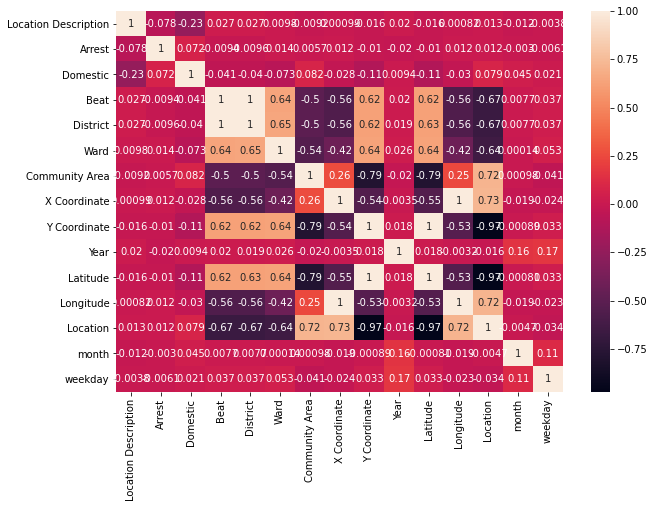

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(corelation,annot=True)

In [33]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude

selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']

In [34]:
X=cp_crime[selected_cols]
Y=cp_crime['crimeType']

In [35]:
Y=Y.astype(int)
Y.dtype

dtype('int32')

In [36]:
cp_crime

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,460,BATTERY,72,0,0,0.702145,18,43.0,7.0,08B,0.705986,0.711926,2015,41.914676,-87.638872,-0.048231,9,5,2
1,1320,CRIMINAL DAMAGE,72,0,0,0.586221,15,28.0,25.0,14,0.423994,0.626750,2015,41.883446,-87.746613,-0.068916,9,5,3
2,486,BATTERY,7,0,0,0.635314,16,41.0,76.0,08B,0.002632,0.880575,2015,41.979006,-87.906463,-0.226267,8,6,2
3,860,THEFT,46,1,0,0.664604,17,45.0,15.0,6,0.426655,0.814080,2015,41.953443,-87.744957,-0.130653,9,0,1
4,486,BATTERY,12,0,1,0.091172,3,5.0,43.0,08B,0.858141,0.327691,2015,41.770731,-87.582576,0.105637,9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,486,BATTERY,60,0,1,0.744224,19,46.0,3.0,08B,0.659262,0.826344,2015,41.957537,-87.656223,-0.094312,9,5,2
4996,486,BATTERY,69,1,1,0.586221,15,28.0,25.0,08B,0.426386,0.644977,2015,41.890253,-87.745640,-0.074553,9,0,2
4997,890,THEFT,70,0,0,0.000000,1,42.0,32.0,6,0.738334,0.637699,2015,41.886864,-87.626852,-0.017987,9,0,1
4998,486,BATTERY,12,0,1,0.743812,19,46.0,3.0,08B,0.662839,0.845796,2015,41.964798,-87.654782,-0.100144,10,5,2


In [37]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')

Location Description:81
Arrest:2
Domestic:2
Beat:273
Ward:50
Community Area:77
Year:3
X Coordinate:4369
Y Coordinate:4445
Location:4580


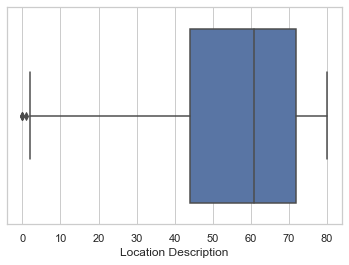

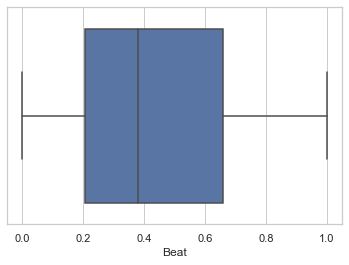

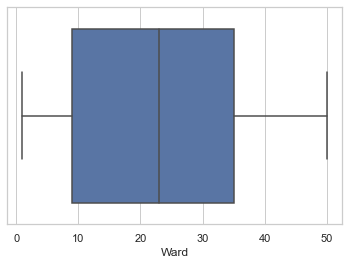

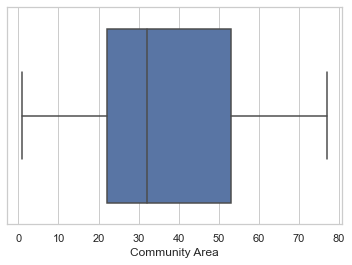

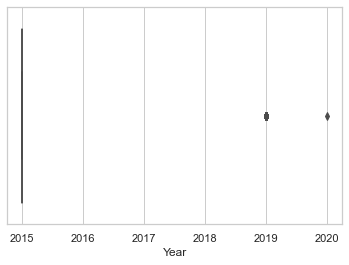

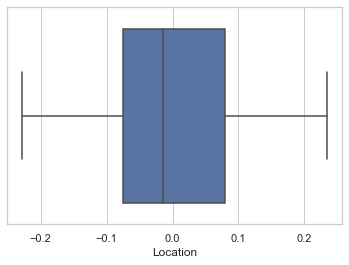

In [38]:
sns.set_theme(style="whitegrid")
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']      
sns.boxplot(x=cp_crime['Location Description'])
plt.show()
sns.boxplot(x=cp_crime['Beat'])
plt.show()
sns.boxplot(x=cp_crime['Ward'])
plt.show()
sns.boxplot(x=cp_crime['Community Area'])
plt.show()
sns.boxplot(x=cp_crime['Year'])
plt.show()
sns.boxplot(x=cp_crime['Location'])
plt.show()

In [39]:

# Training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [40]:
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

In [41]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="saga", multi_class='ovr',max_iter=12000)
lr.fit(X_train, y_train)
print('Accuracy of Logistic Regression', lr.score(X_test, y_test))

Accuracy of Logistic Regression 0.529


In [42]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Accuracy of Naive Bayes', gnb.score(X_test, y_test))

Accuracy of Naive Bayes 0.519


In [43]:
# #  Categoric Naivee Bayes

# from sklearn.naive_bayes import CategoricalNB
# cnb = CategoricalNB()
# cnb.fit(X_train,y_train)
# print('Accuracy of Categoric Naive Byaes', cnb.score(X_test, y_test)) 

In [44]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('Accuracy of KNN', knn.score(X_test, y_test))
pred_train = knn.predict(X_train)
pred_i = knn.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))

Accuracy of KNN 0.482
Test accuracy  0.563
Accuracy  0.482


In [45]:
random_search.best_params_

NameError: name 'random_search' is not defined

In [ ]:
xgb=xgb.set_params(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=5,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0)
xgb.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

In [ ]:
print(xgb)

In [ ]:
y_train.unique()

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 300) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# # SVM

# from sklearn.svm import SVC
# svm = SVC(gamma='auto')
# svm.fit(X_train, y_train)
# print('Accuracy of SVM', svm.score(X_test, y_test))

In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
y_pred = tree.fit(X_train, y_train).predict(X_test)

total_datapoints = X_test.shape[0]
mislabeled_datapoints = (y_test != y_pred).sum()
correct_datapoints = total_datapoints-mislabeled_datapoints
percent_correct = (correct_datapoints / total_datapoints) * 100

print("DecisionTreeClassifier results for NSL-KDD:\n")
print("Total datapoints: %d\nCorrect datapoints: %d\nMislabeled datapoints: %d\nPercent correct: %.2f%%"
      % (total_datapoints, correct_datapoints, mislabeled_datapoints, percent_correct))

In [ ]:
# Decision Tree Classifier (J48)

from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1000)


j48 = DecisionTreeClassifier(criterion = "gini",random_state = 1000,max_depth=500, min_samples_leaf=600)
j48.fit(X_train, y_train)
print(j48)
             
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1000,max_depth = 500, min_samples_leaf = 600)
clf_entropy.fit(X_train, y_train)
print(clf_entropy)
             
y_pred = j48.predict(X_test)
# print("Predicted values:")
# print(y_pred)
             
# print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print ("Accuracy : ",accuracy_score(y_test,y_pred))
# print("Report : ",classification_report(y_test, y_pred))

             

In [46]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
adb = AdaBoostClassifier(n_estimators=300,  learning_rate=1)
# Train Adaboost Classifer
model = adb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.556


In [ ]:
# Using Cross Validation
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

In [47]:
# # Logistic Regression

from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_train, y_train,cv=10)
score
print('Logistic Regression boost Using Cross Validation: ',score.mean())

Logistic Regression boost Using Cross Validation:  0.518


In [48]:
# # Naive Bayes

from sklearn.model_selection import cross_val_score
score=cross_val_score(gnb,X_train, y_train,cv=10)
score
print('Naive Bayes Using Cross Validation: ',score.mean())

Naive Bayes Using Cross Validation:  0.5127499999999999


In [ ]:
# # Categoric Naive Bayes

from sklearn.model_selection import cross_val_score
score=cross_val_score(cnb,X_train, y_train,cv=10)
score
print('Categoric Naive Bayes Using Cross Validation: ',score.mean())

In [49]:
# # KNN

from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X_train, y_train,cv=10)
score
print('KNN Using Cross Validation: ',score.mean())

KNN Using Cross Validation:  0.47224999999999995


In [ ]:
# # Random Forest

from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X_train, y_train,cv=10)
score
print('Random Forest Using Cross Validation: ',score.mean())

In [ ]:
# # SVM

from sklearn.model_selection import cross_val_score
score=cross_val_score(svm,X_train, y_train,cv=10)
score
print('Random Forest Using Cross Validation: ',score.mean())

In [ ]:
# # Decision Tree

from sklearn.model_selection import cross_val_score
score=cross_val_score(tree,X_train, y_train,cv=10)
score
print('Decision Using Cross Validation: ',score.mean())

In [ ]:
# # Decision Tree Classifier (J48)

from sklearn.model_selection import cross_val_score
score=cross_val_score(j48,X_train, y_train,cv=10)
score
print('J46 Using Cross Validation: ',score.mean())

In [ ]:
# # Ada Boost

from sklearn.model_selection import cross_val_score
score=cross_val_score(adb,X_train, y_train,cv=10)
score
print('Ada BoostUsing Cross Validation: ',score.mean())